<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data_multi_delta_(0)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,84.898788,0.162873,95.061661,94.943053,0.118608
1,0.0,1.0,67.088598,0.570466,77.659064,77.141646,0.517418
2,0.0,2.0,53.962373,-2.699020,61.263353,64.021895,-2.758542
3,0.0,3.0,88.842334,-0.233024,98.609310,98.884654,-0.275344
4,0.0,4.0,74.679139,0.242877,84.922016,84.728444,0.193572
...,...,...,...,...,...,...,...
29995,999.0,25.0,74.050429,2.600518,86.650948,84.490590,2.160358
29996,999.0,26.0,43.716194,0.356963,54.073157,53.343376,0.729781
29997,999.0,27.0,75.651455,0.987232,86.638686,86.134523,0.504163
29998,999.0,28.0,29.221801,-1.977837,37.243965,38.460523,-1.216558


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,84.898788,0.162873,95.061661,94.943053,0.118608
1,0.0,1.0,67.088598,0.570466,77.659064,77.141646,0.517418
2,0.0,2.0,53.962373,-2.699020,61.263353,64.021895,-2.758542
3,0.0,3.0,88.842334,-0.233024,98.609310,98.884654,-0.275344
4,0.0,4.0,74.679139,0.242877,84.922016,84.728444,0.193572
...,...,...,...,...,...,...,...
29995,999.0,25.0,74.050429,2.600518,86.650948,84.490590,2.160358
29996,999.0,26.0,43.716194,0.356963,54.073157,53.343376,0.729781
29997,999.0,27.0,75.651455,0.987232,86.638686,86.134523,0.504163
29998,999.0,28.0,29.221801,-1.977837,37.243965,38.460523,-1.216558


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    84.898788  0.162873  95.061661  94.943053  0.118608
      1.0    67.088598  0.570466  77.659064  77.141646  0.517418
      2.0    53.962373 -2.699020  61.263353  64.021895 -2.758542
      3.0    88.842334 -0.233024  98.609310  98.884654 -0.275344
      4.0    74.679139  0.242877  84.922016  84.728444  0.193572
...                ...       ...        ...        ...       ...
999.0 25.0   74.050429  2.600518  86.650948  84.490590  2.160358
      26.0   43.716194  0.356963  54.073157  53.343376  0.729781
      27.0   75.651455  0.987232  86.638686  86.134523  0.504163
      28.0   29.221801 -1.977837  37.243965  38.460523 -1.216558
      29.0   72.701433  0.694135  83.395568  83.105439  0.290129

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    84.898788  0.162873  95.061661  94.943053  0.118608
      1.0    67.088598  0.570466  77.659064  77.141646  0.517418
      2.0    53.962373 -2.699020  61.263353  64.021895 -2.758542
      3.0    88.842334 -0.233024  98.609310  98.884654 -0.275344
      4.0    74.679139  0.242877  84.922016  84.728444  0.193572
...                ...       ...        ...        ...       ...
999.0 25.0   74.050429  2.600518  86.650948  84.490590  2.160358
      26.0   43.716194  0.356963  54.073157  53.343376  0.729781
      27.0   75.651455  0.987232  86.638686  86.134523  0.504163
      28.0   29.221801 -1.977837  37.243965  38.460523 -1.216558
      29.0   72.701433  0.694135  83.395568  83.105439  0.290129

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,84.898788,0.162873,95.061661,94.943053,0.118608
1,0.0,1.0,67.088598,0.570466,77.659064,77.141646,0.517418
2,0.0,2.0,53.962373,-2.699020,61.263353,64.021895,-2.758542
3,0.0,3.0,88.842334,-0.233024,98.609310,98.884654,-0.275344
4,0.0,4.0,74.679139,0.242877,84.922016,84.728444,0.193572
...,...,...,...,...,...,...,...
29995,999.0,25.0,74.050429,2.600518,86.650948,84.490590,2.160358
29996,999.0,26.0,43.716194,0.356963,54.073157,53.343376,0.729781
29997,999.0,27.0,75.651455,0.987232,86.638686,86.134523,0.504163
29998,999.0,28.0,29.221801,-1.977837,37.243965,38.460523,-1.216558


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    84.898788  0.162873  95.061661  94.943053  0.118608
      1.0    67.088598  0.570466  77.659064  77.141646  0.517418
      2.0    53.962373 -2.699020  61.263353  64.021895 -2.758542
      3.0    88.842334 -0.233024  98.609310  98.884654 -0.275344
      4.0    74.679139  0.242877  84.922016  84.728444  0.193572
...                ...       ...        ...        ...       ...
999.0 25.0   74.050429  2.600518  86.650948  84.490590  2.160358
      26.0   43.716194  0.356963  54.073157  53.343376  0.729781
      27.0   75.651455  0.987232  86.638686  86.134523  0.504163
      28.0   29.221801 -1.977837  37.243965  38.460523 -1.216558
      29.0   72.701433  0.694135  83.395568  83.105439  0.290129

[30000 rows x 5 columns]

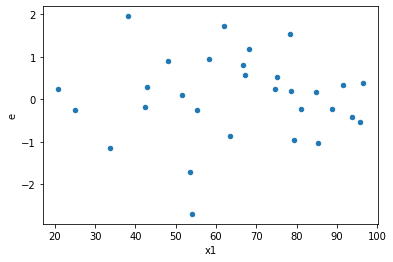

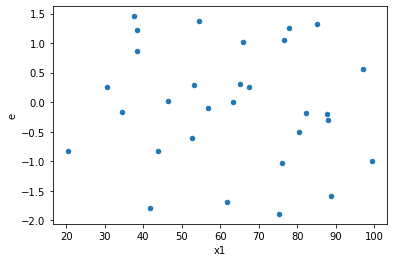

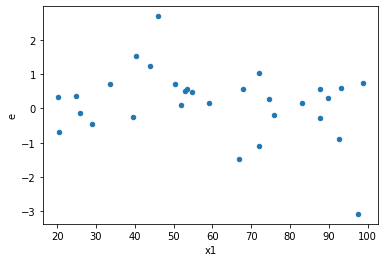

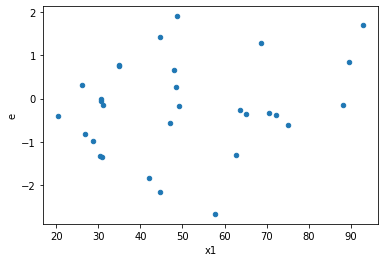

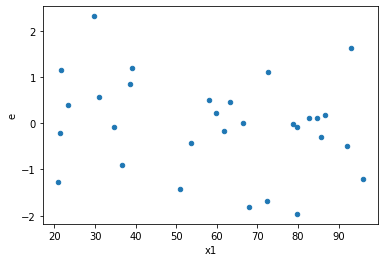

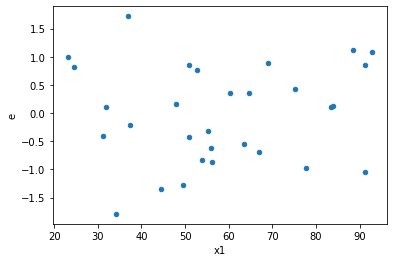

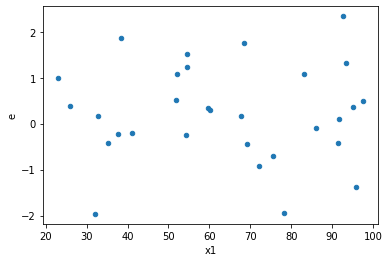

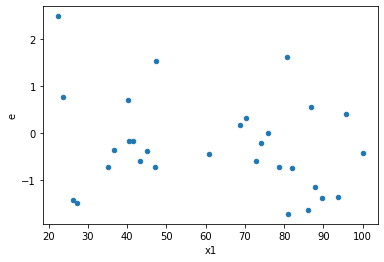

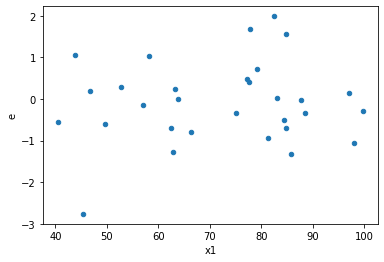

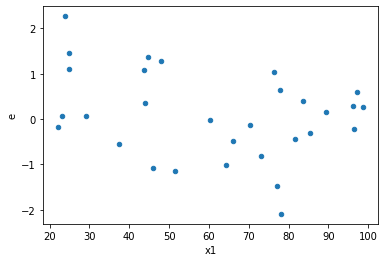

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x1')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,11.0,11.0,11.006801045032809,12.734073531870548,1.0006182768211644,1.157643048351868,1.1569277467422954,0.8132756806047259,0.5933621596976371,0.40663784030236294,Reject001=1 : Homoscedasticity
2.0,11.0,11.0,7.391332727265048,13.004856964145656,0.6719393388422771,1.1822597240132415,1.759473892465092,0.36276897975258726,0.8186155101237064,0.18138448987629363,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,7.741607946402566,9.531980412982309,0.7037825405820515,0.8665436739074827,1.2312662277623743,0.7361453793226893,0.6319273103386553,0.36807268966134465,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,10.952803158164349,12.748582383413769,0.9957093780149407,1.1589620348557972,1.1639561306194777,0.8056764051734817,0.5971617974132591,0.40283820258674086,Reject001=1 : Homoscedasticity
11.0,11.0,11.0,4.870643686617324,12.480199507041595,0.442785789692484,1.134563591549236,2.562330630206524,0.13383784953528566,0.9330810752323572,0.06691892476764283,Reject001=1 : Homoscedasticity
13.0,11.0,11.0,9.216679575485013,11.013988687545819,0.8378799614077285,1.0012716988678017,1.1950061404805021,0.7728761735240934,0.6135619132379533,0.3864380867620467,Reject001=1 : Homoscedasticity
15.0,11.0,11.0,5.103973671294833,7.257521068447443,0.46399760648134847,0.6597746425861312,1.4219354439981415,0.5692007036622306,0.7153996481688847,0.2846003518311153,Reject001=1 : Homoscedasticity
16.0,11.0,11.0,9.633343920472484,10.565670839308208,0.8757585382247712,0.9605155308462007,1.0967812346919714,0.8809770842462645,0.5595114578768677,0.44048854212313227,Reject001=1 : Homoscedasticity
18.0,11.0,11.0,12.580646411665278,14.713955463592198,1.143695128333207,1.337632314872018,1.1695707026587148,0.799652298810154,0.600173850594923,0.399826149405077,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,16.638435669483556,5.14733538618066,1.5125850608621414,0.4679395805618782,0.30936414266524787,0.06396298048633693,Reject001=1 : Homoscedasticity
1.0,11.0,11.0,11.006801045032809,12.734073531870548,1.0006182768211644,1.157643048351868,1.1569277467422954,0.8132756806047259,Reject001=1 : Homoscedasticity
2.0,11.0,11.0,7.391332727265048,13.004856964145656,0.6719393388422771,1.1822597240132415,1.759473892465092,0.36276897975258726,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,7.741607946402566,9.531980412982309,0.7037825405820515,0.8665436739074827,1.2312662277623743,0.7361453793226893,Reject001=1 : Homoscedasticity
4.0,11.0,11.0,12.70646720701179,11.663445647310143,1.1551333824556174,1.0603132406645583,0.9179141186366829,0.889585479109439,Reject001=1 : Homoscedasticity
5.0,11.0,11.0,11.24050410331803,6.37430458442089,1.0218640093925482,0.5794822349473536,0.5670835156351475,0.3608986620471199,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,10.952803158164349,12.748582383413769,0.9957093780149407,1.1589620348557972,1.1639561306194777,0.8056764051734817,Reject001=1 : Homoscedasticity
7.0,11.0,11.0,11.720904511785697,11.322648642091657,1.0655367737986998,1.0293316947356053,0.96602174607825,0.9553113006043108,Reject001=1 : Homoscedasticity
8.0,11.0,11.0,11.793690929298252,10.378067724828849,1.0721537208452956,0.943460702257168,0.8799677545430101,0.8358372279418395,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      988
Reject001=0 : Heteroscedasticity     12
Name: Result_test, dtype: int64